# Practice Logistic Regression with Python 3
This is a learning practice with [Titanic Data Set](https://www.kaggle.com/c/titanic) from Kaggle.

This data set contains the following features:

* 'Survival': Survival (0 = No, 1 = Yes)
* 'Pclass': Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* 'Sex': Sex
* 'Age': Age in years
* 'Sibsp': Number of siblings / spouses aboard the Titanic
* 'Parch': Number of parents / children aboard the Titanic
* 'Ticket': Ticket number
* 'Fare': Passenger fare
* 'Cabin': Cabin number
* 'Embarked': Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
#Import the lbraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
T_train = pd.read_csv('titanic_train.csv')
T_test = pd.read_csv('titanic_test.csv')

In [3]:
T_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
T_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
T_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
T_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Checking the missing data

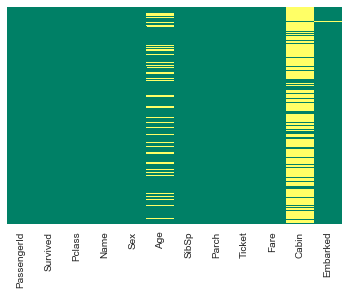

In [7]:
sns.set_style('darkgrid')
sns.heatmap(T_train.isnull(), yticklabels=False, cbar=False, cmap='summer')

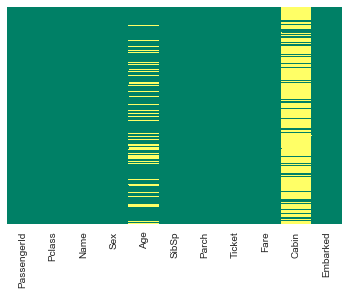

In [8]:
sns.heatmap(T_test.isnull(), yticklabels=False, cbar=False, cmap='summer')

# Data Cleaning


Cleaning the T_train data set first

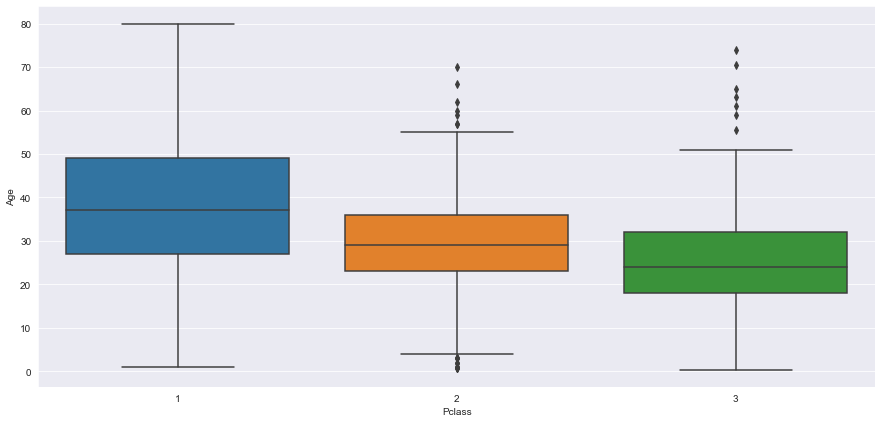

In [9]:
##Filling in the missing Age data instead of droping the null value

plt.figure(figsize=(15,7))
sns.boxplot(x='Pclass', y='Age', data=T_train)

In [10]:
T_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
def filling_train_age(x):
    Pclass=x[0]
    Age=x[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [12]:
T_train['Age'] = T_train[['Pclass', 'Age']].apply(filling_train_age,axis=1)

In [13]:
T_train.drop('Cabin', axis=1, inplace=True)

In [14]:
T_train.dropna(inplace=True)

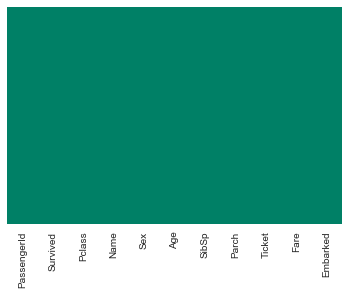

In [15]:
sns.heatmap(T_train.isnull(), yticklabels=False, cbar=False, cmap='summer')

# Cleaning the T_test data set

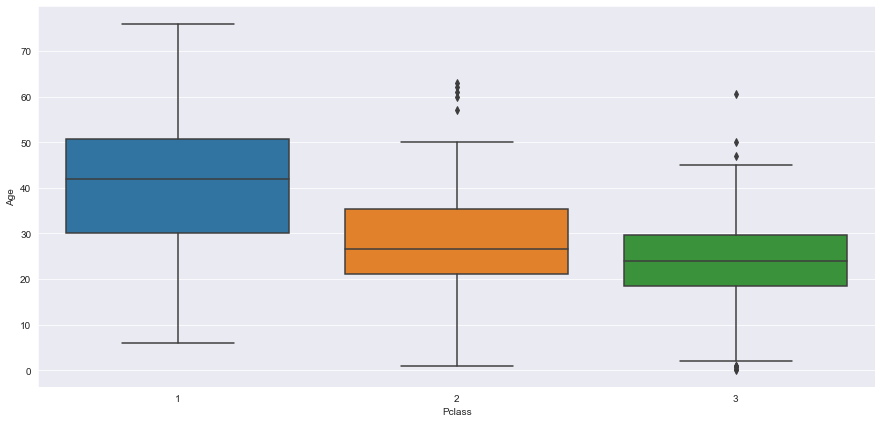

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Pclass', y='Age', data=T_test)

In [17]:
T_test.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [18]:
def filling_test_age(y):
    Pclass=y[0]
    Age=y[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

In [19]:
T_test['Age'] = T_train[['Pclass', 'Age']].apply(filling_test_age,axis=1)
T_test.drop('Cabin', axis=1, inplace=True)
T_test.dropna(inplace=True)

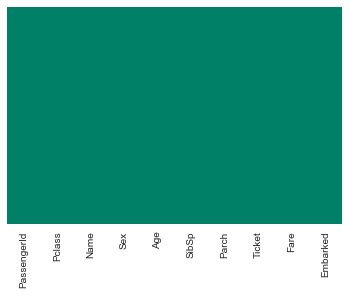

In [20]:
sns.heatmap(T_test.isnull(), yticklabels=False, cbar=False, cmap='summer')

# Data Visualization with T_train data set

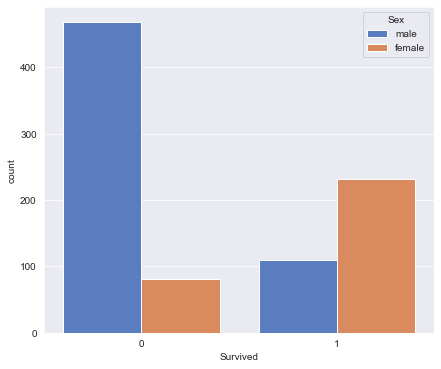

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(x='Survived', hue='Sex', data=T_train, palette='muted')

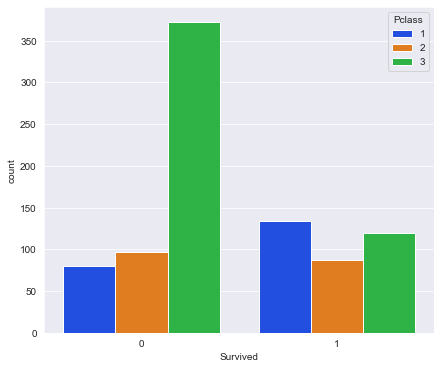

In [22]:
plt.figure(figsize=(7,6))
sns.countplot(x='Survived', hue='Pclass', data=T_train, palette='bright')

In [23]:
T_train['Age_Bins'] = pd.cut(x=T_train['Age'], bins=[0,20,40,60,80])

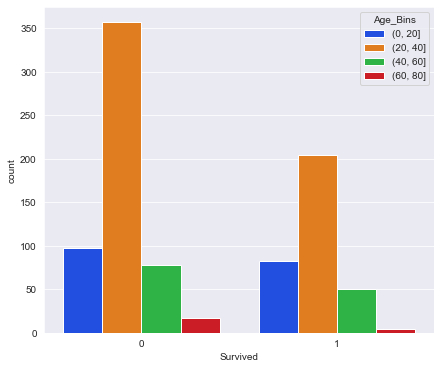

In [24]:
plt.figure(figsize=(7,6))
sns.countplot(x='Survived', hue='Age_Bins', data=T_train, palette='bright')

In [25]:
by_Sib = T_train.groupby('SibSp').size()
by_Sib

SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

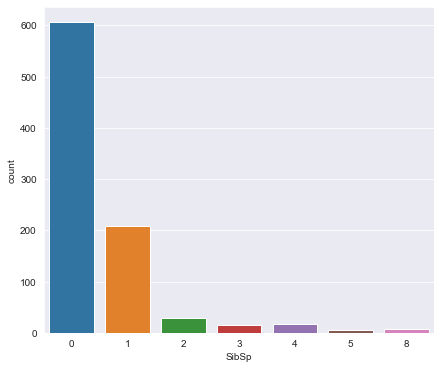

In [26]:
plt.figure(figsize=(7,6))
sns.countplot(x='SibSp', data=T_train)

# Converting Categorical Features

In [27]:
T_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 40]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(20, 40]"


In [28]:
Pclass = pd.get_dummies(T_train['Pclass'], drop_first=True)
Sex = pd.get_dummies(T_train['Sex'], drop_first=True)
Embarked = pd.get_dummies(T_train['Embarked'], drop_first=True)

In [29]:
T_train = pd.concat([T_train, Pclass, Sex, Embarked], axis=1)

In [30]:
T_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 40]",0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(20, 40]",0,0,0,0,0


In [31]:
T_train.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked', 'Age_Bins'], axis=1, inplace=True)

In [32]:
T_train.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0


In [33]:
Pclass = pd.get_dummies(T_test['Pclass'], drop_first=True)
Sex = pd.get_dummies(T_test['Sex'], drop_first=True)
Embarked = pd.get_dummies(T_test['Embarked'], drop_first=True)
T_test = pd.concat([T_test, Pclass, Sex, Embarked], axis=1)
T_test.drop(['Name', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [34]:
T_test.head(3)

,PassengerId,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,892,22.0,0,0,7.8292,0,1,1,1,0
1,893,38.0,1,0,7.0000,0,1,0,0,1
2,894,26.0,0,0,9.6875,1,0,1,1,0


# Building the Logistic Regression model with T_train data set

In [35]:
X = T_train.drop('Survived', axis = 1)
y = T_train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)

/Users/junkaikong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
prediction = lgmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[151  12]
 [ 34  70]]


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       163
           1       0.85      0.67      0.75       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



# Extra: Applying RandomForestClassifier to the data set

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=230)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[145  18]
 [ 28  76]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       163
           1       0.81      0.73      0.77       104

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

